In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the API key
from config import weather_api_key

In [4]:
# Create URL for OpenWeatherMap
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

### Create a list of cities

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Unzip coordinates into a list
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

### Loop through the cities list and build the city URL

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | college
Processing Record 2 of Set 1 | brae
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | ixtapa
Processing Record 5 of Set 1 | mahebourg
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | hamilton
Processing Record 8 of Set 1 | torrevieja
Processing Record 9 of Set 1 | quatre cocos
Processing Record 10 of Set 1 | itarema
Processing Record 11 of Set 1 | chara
Processing Record 12 of Set 1 | san quintin
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | gushikawa
Processing Record 15 of Set 1 | krasnyy oktyabr
Processing Record 16 of Set 1 | mar del plata
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 19 of Set 1 | lorengau
Processing Record 20 of Set 1 | atambua
Processing Record 21 of Set 1 | saskylakh
Processing Record 22 of Set 1 | upernavik
Pr

City not found. Skipping...
Processing Record 37 of Set 4 | pevek
Processing Record 38 of Set 4 | tommot
Processing Record 39 of Set 4 | lagoa
Processing Record 40 of Set 4 | diamantino
Processing Record 41 of Set 4 | nosy varika
Processing Record 42 of Set 4 | sisimiut
Processing Record 43 of Set 4 | ketchikan
Processing Record 44 of Set 4 | prince rupert
Processing Record 45 of Set 4 | bethel
Processing Record 46 of Set 4 | trois-rivieres
Processing Record 47 of Set 4 | codrington
Processing Record 48 of Set 4 | ambovombe
Processing Record 49 of Set 4 | flinders
Processing Record 50 of Set 4 | ako
Processing Record 1 of Set 5 | avarua
Processing Record 2 of Set 5 | qaanaaq
Processing Record 3 of Set 5 | ribeira grande
Processing Record 4 of Set 5 | west bend
Processing Record 5 of Set 5 | mananara
Processing Record 6 of Set 5 | iskateley
Processing Record 7 of Set 5 | la baule-escoublac
Processing Record 8 of Set 5 | victoria
Processing Record 9 of Set 5 | tumannyy
City not found. Sk

Processing Record 24 of Set 8 | yilan
Processing Record 25 of Set 8 | comodoro rivadavia
Processing Record 26 of Set 8 | castro
Processing Record 27 of Set 8 | la mata
Processing Record 28 of Set 8 | narasannapeta
Processing Record 29 of Set 8 | mazagao
Processing Record 30 of Set 8 | liwale
Processing Record 31 of Set 8 | ambon
Processing Record 32 of Set 8 | revda
Processing Record 33 of Set 8 | honningsvag
Processing Record 34 of Set 8 | kawalu
Processing Record 35 of Set 8 | alice springs
Processing Record 36 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 37 of Set 8 | lensk
Processing Record 38 of Set 8 | havre-saint-pierre
Processing Record 39 of Set 8 | manuk mangkaw
Processing Record 40 of Set 8 | nelson bay
Processing Record 41 of Set 8 | madimba
Processing Record 42 of Set 8 | menongue
Processing Record 43 of Set 8 | northam
Processing Record 44 of Set 8 | vostok
Processing Record 45 of Set 8 | soure
Processing Record 46 of Set 8 | maniitsoq
Processing R

Processing Record 11 of Set 12 | tokat
Processing Record 12 of Set 12 | dutlwe
Processing Record 13 of Set 12 | coquimbo
Processing Record 14 of Set 12 | segovia
Processing Record 15 of Set 12 | arlit
Processing Record 16 of Set 12 | kudahuvadhoo
Processing Record 17 of Set 12 | sarangani
Processing Record 18 of Set 12 | haridwar
Processing Record 19 of Set 12 | sola
Processing Record 20 of Set 12 | cairns
Processing Record 21 of Set 12 | ruwi
Processing Record 22 of Set 12 | gol
Processing Record 23 of Set 12 | langue
Processing Record 24 of Set 12 | linchuan
City not found. Skipping...
Processing Record 25 of Set 12 | santa eulalia
Processing Record 26 of Set 12 | saldanha
Processing Record 27 of Set 12 | pathein
Processing Record 28 of Set 12 | chala
Processing Record 29 of Set 12 | kutum
Processing Record 30 of Set 12 | boyolangu
Processing Record 31 of Set 12 | san antonio
Processing Record 32 of Set 12 | yining
Processing Record 33 of Set 12 | sindor
Processing Record 34 of Set 1

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,College,64.8569,-147.8028,67.08,46,75,4.61,US,2022-06-02 17:40:09
1,Brae,60.3964,-1.3530,50.85,79,56,13.31,GB,2022-06-02 17:44:07
2,Ushuaia,-54.8000,-68.3000,37.06,65,0,3.44,AR,2022-06-02 17:41:10
3,Ixtapa,20.7000,-105.2000,74.43,88,100,5.75,MX,2022-06-02 17:44:08
4,Mahebourg,-20.4081,57.7000,73.69,83,40,8.05,MU,2022-06-02 17:43:34
5,New Norfolk,-42.7826,147.0587,42.30,82,100,2.73,AU,2022-06-02 17:44:08
6,Hamilton,39.1834,-84.5333,72.95,79,100,9.22,US,2022-06-02 17:40:30
7,Torrevieja,37.9787,-0.6822,84.60,76,89,1.99,ES,2022-06-02 17:44:09
8,Quatre Cocos,-20.2078,57.7625,73.51,74,29,10.87,MU,2022-06-02 17:44:10
9,Itarema,-2.9248,-39.9167,81.41,80,91,9.66,BR,2022-06-02 17:44:10


In [10]:
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [12]:
# Reorder the columns
col_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp','Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[col_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,College,US,2022-06-02 17:40:09,64.8569,-147.8028,67.08,46,75,4.61
1,Brae,GB,2022-06-02 17:44:07,60.3964,-1.3530,50.85,79,56,13.31
2,Ushuaia,AR,2022-06-02 17:41:10,-54.8000,-68.3000,37.06,65,0,3.44
3,Ixtapa,MX,2022-06-02 17:44:08,20.7000,-105.2000,74.43,88,100,5.75
4,Mahebourg,MU,2022-06-02 17:43:34,-20.4081,57.7000,73.69,83,40,8.05


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

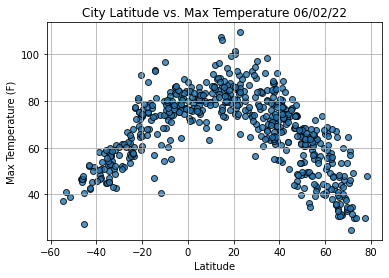

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/fig1.png")

# Show plot.
plt.show()


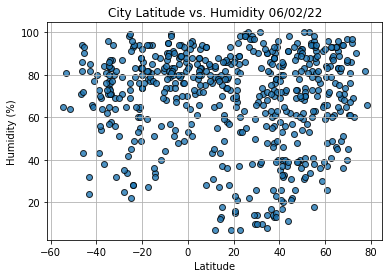

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/fig2.png")
# Show plot.
plt.show()


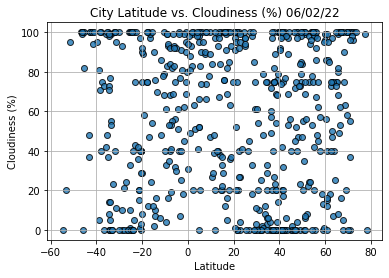

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/fig3.png")
# Show plot.
plt.show()

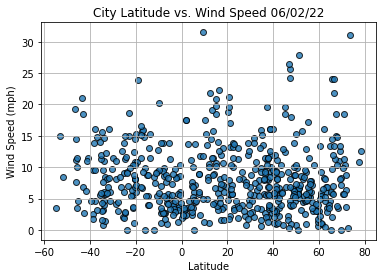

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/fig4.png")
# Show plot.
plt.show()